# Data Science Pragmatic programming in Python: Time Series


https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

Code snippets for quick consult (copy n paste)

In [1]:
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import IPython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
!pwd

/mnt/sdb1/leandro/ds_pragmatic_programming


## Data wrangler

### Date manipulation

In [9]:
from datetime import datetime, date, timedelta
from dateutil import parser

date = datetime(year=2015, month=7, day=4)
date

date = parser.parse("4th of July, 2015")
date


# convert string to date
date_time_str = '2018-06-29 08:15:27.243860'
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')

print('Date:', date_time_obj.date())
print('Time:', date_time_obj.time())
print('Date-time:', date_time_obj)

# convert date to string
date_time_obj.strftime("%Y/%m/%d")

datetime.datetime(2015, 7, 4, 0, 0)

datetime.datetime(2015, 7, 4, 0, 0)

Date: 2018-06-29
Time: 08:15:27.243860
Date-time: 2018-06-29 08:15:27.243860


'2018/06/29'

* **Generate list of dates between 2 dates**

In [11]:
_date = "2020-09-01"
end_date = "2020-09-10"

date1 = datetime.strptime(_date, "%Y-%m-%d")
date2 = datetime.strptime(end_date, "%Y-%m-%d")

ndays = (date2 - date1).days

ndays

date_list = [date1 + timedelta(days=n) for n in range(ndays)]

date_list

9

[datetime.datetime(2020, 9, 1, 0, 0),
 datetime.datetime(2020, 9, 2, 0, 0),
 datetime.datetime(2020, 9, 3, 0, 0),
 datetime.datetime(2020, 9, 4, 0, 0),
 datetime.datetime(2020, 9, 5, 0, 0),
 datetime.datetime(2020, 9, 6, 0, 0),
 datetime.datetime(2020, 9, 7, 0, 0),
 datetime.datetime(2020, 9, 8, 0, 0),
 datetime.datetime(2020, 9, 9, 0, 0)]

### Date manipulation with pnadas and numpy

In [ ]:

date = pd.to_datetime("4th of July, 2015")
date


date = np.array('2015-07-04', dtype=np.datetime64)
date

date + np.arange(3)


**Pandas freq meanings**

* D	Calendar day	
* W	Weekly		
* M	Month end	
* Q	Quarter end	
* A	Year end	
* H	Hours	
* T	Minutes		
* S	Seconds		
* L	Milliseonds		
* U	Microseconds		
* N	nanoseconds
* B	Business day
* BM	Business month end
* BQ	Business quarter end
* BA	Business year end
* BH	Business hours

In [4]:
pd.date_range('2015-07-03', periods=3, freq='D')

pd.period_range('2015-11', periods=3, freq='M')

pd.timedelta_range(0, periods=3, freq='H')


date1 = '2011-05-03'
date2 = '2011-05-10'

mydates = pd.date_range(date1, date2).tolist()

mydates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05'], dtype='datetime64[ns]', freq='D')

PeriodIndex(['2015-11', '2015-12', '2016-01'], dtype='period[M]', freq='M')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00'], dtype='timedelta64[ns]', freq='H')

[Timestamp('2011-05-03 00:00:00', freq='D'),
 Timestamp('2011-05-04 00:00:00', freq='D'),
 Timestamp('2011-05-05 00:00:00', freq='D'),
 Timestamp('2011-05-06 00:00:00', freq='D'),
 Timestamp('2011-05-07 00:00:00', freq='D'),
 Timestamp('2011-05-08 00:00:00', freq='D'),
 Timestamp('2011-05-09 00:00:00', freq='D'),
 Timestamp('2011-05-10 00:00:00', freq='D')]

* **convert column to datetime**

In [37]:
df = pd.DataFrame({"Date1": ['2014-07-04 12:00:01', '2014-08-04 12:01:01','2015-07-04 13:00:04', '2015-08-04 12:00:01'],
                  "Date2": ['2014-07-10 12:00:01', '2014-09-04 12:00:01','2015-07-03 12:00:01', '2015-08-04 12:00:22']})

df.info()
df.head()

df['Date1'] = pd.to_datetime(df['Date1'])
df['Date2'] = pd.to_datetime(df['Date2']) 

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
Date1    4 non-null object
Date2    4 non-null object
dtypes: object(2)
memory usage: 144.0+ bytes


,Date1,Date2
0,2014-07-04 12:00:01,2014-07-10 12:00:01
1,2014-08-04 12:01:01,2014-09-04 12:00:01
2,2015-07-04 13:00:04,2015-07-03 12:00:01
3,2015-08-04 12:00:01,2015-08-04 12:00:22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
Date1    4 non-null datetime64[ns]
Date2    4 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 144.0 bytes


,Date1,Date2
0,2014-07-04 12:00:01,2014-07-10 12:00:01
1,2014-08-04 12:01:01,2014-09-04 12:00:01
2,2015-07-04 13:00:04,2015-07-03 12:00:01
3,2015-08-04 12:00:01,2015-08-04 12:00:22


* **date diff**

In [38]:
diff = (df.Date2 -df.Date1)

df['diff_days'] = diff.dt.days
df['diff_seconds'] = diff.dt.seconds

df.head()

,Date1,Date2,diff_days,diff_seconds
0,2014-07-04 12:00:01,2014-07-10 12:00:01,6,0
1,2014-08-04 12:01:01,2014-09-04 12:00:01,30,86340
2,2015-07-04 13:00:04,2015-07-03 12:00:01,-2,82797
3,2015-08-04 12:00:01,2015-08-04 12:00:22,0,21


### Indexing dataframe by date

It is useful because you can pass any valu that can be coerced into dates:

In [6]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [7]:
print('Filter by selected days')
data['2014-07-04':'2015-07-04']
print()

print('get all rows in a year')
data['2015']

Filter by selected days


2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64


get all rows in a year


2015-07-04    2
2015-08-04    3
dtype: int64

In [8]:
import quandl
import datetime

# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2004,1,1)
end = datetime.date.today()

s = "AAPL"
apple = quandl.get("WIKI/" + s, start_date=start, end_date=end)
 
type(apple)

apple.head(3)

pandas.core.frame.DataFrame

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-01-02,21.55,21.75,21.18,21.28,2582900.0,0.0,1.0,1.384738,1.397589,1.360963,1.367388,36160600.0
2004-01-05,21.42,22.39,21.42,22.17,7053900.0,0.0,1.0,1.376384,1.438714,1.376384,1.424577,98754600.0
2004-01-06,22.25,22.42,21.71,22.09,9095500.0,0.0,1.0,1.429718,1.440641,1.395019,1.419436,127337000.0


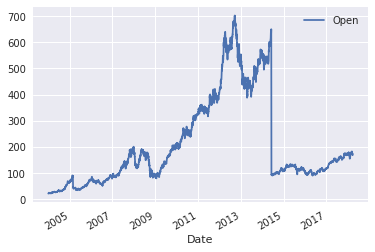

In [9]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

apple.plot(y='Open');

## Resampling

see pandas frequency legends  
BA =>  Business year end


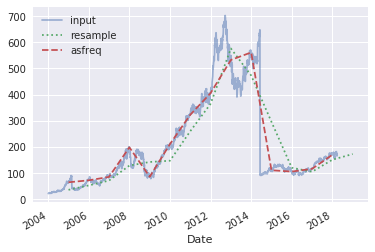

In [10]:
apple = apple.Close

apple.plot(alpha=0.5, style='-')
apple.resample('BA').mean().plot(style=':')
apple.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

**Summarize data: daily, weekly n monthly **


In [11]:
daily = apple.resample('D').sum()
weekly = apple.resample('W').sum()
monthly = apple.resample('M').sum()
quartely = apple.resample('Q').sum()

type(weekly)
weekly.head(5)

print()
monthly.head(3)

print()
quartely.head(3)

pandas.core.series.Series

Date
2004-01-04     21.28
2004-01-11    113.21
2004-01-18    117.62
2004-01-25     90.08
2004-02-01    113.84
Freq: W-SUN, Name: Close, dtype: float64

Date
2004-01-31    456.030
2004-02-29    433.287
2004-03-31    602.560
Freq: M, Name: Close, dtype: float64

Date
2004-03-31    1491.877
2004-06-30    1777.580
2004-09-30    2125.940
Freq: Q-DEC, Name: Close, dtype: float64

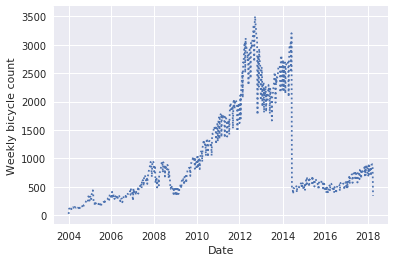

In [12]:
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

###  Rolling windows (TODO)
https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

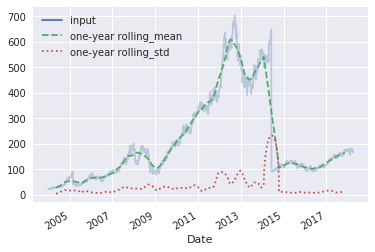

In [13]:
rolling = apple.rolling(182, center=True)

data = pd.DataFrame({'input': apple,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

**Get smoother version of a rolling mean using a window function–for example, a Gaussian window.**

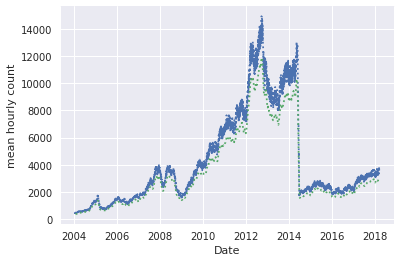

In [14]:

daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');


# smotth version
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);


## lag (shift) operations

shift is specified in multiples of the frequency. So we need to set it first


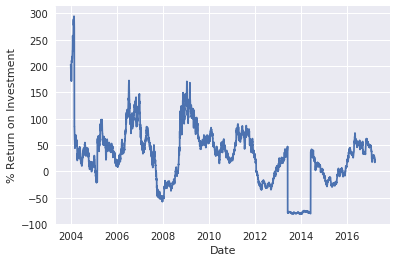

In [15]:
# apply a frequency to the data
apple = apple.asfreq('D', method='pad')

ROI = 100 * (apple.tshift(-365) / apple - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

In [16]:
bikes = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)

bikes.columns = ['West', 'East']
bikes['Total'] = bikes.eval('West + East')

bikes.head()

,West,East,Total
Date,,,
2019-02-28 23:00:00,5.0,6.0,11.0
2019-02-28 22:00:00,4.0,27.0,31.0
2019-02-28 21:00:00,16.0,32.0,48.0
2019-02-28 20:00:00,16.0,50.0,66.0
2019-02-28 19:00:00,39.0,59.0,98.0


In [17]:
bikes.dropna().describe()

,West,East,Total
count,56151.000000,56151.000000,56151.000000
mean,52.049883,58.014212,110.064095
std,67.635627,84.552751,139.523235
min,0.000000,0.000000,0.000000
25%,6.000000,7.000000,14.000000
50%,28.000000,29.000000,59.000000
75%,69.000000,70.000000,143.000000
max,698.000000,717.000000,957.000000


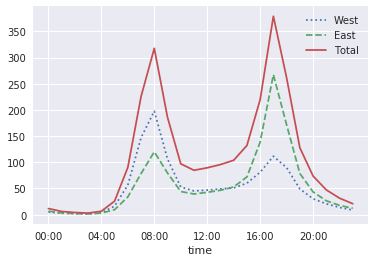

In [18]:
by_time = bikes.groupby(bikes.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening. This is likely evidence of a strong component of commuter traffic crossing the bridge. 

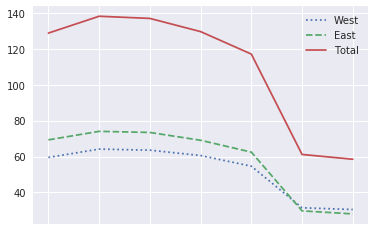

In [19]:
by_weekday = bikes.groupby(bikes.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.


With this in mind, let's do a compound GroupBy and look at the hourly trend on weekdays versus weekends.


In [20]:
weekend = np.where(bikes.index.weekday < 5, 'Weekday', 'Weekend')
by_time = bikes.groupby([weekend, bikes.index.time]).mean()


/home/leandroohf/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
/home/leandroohf/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


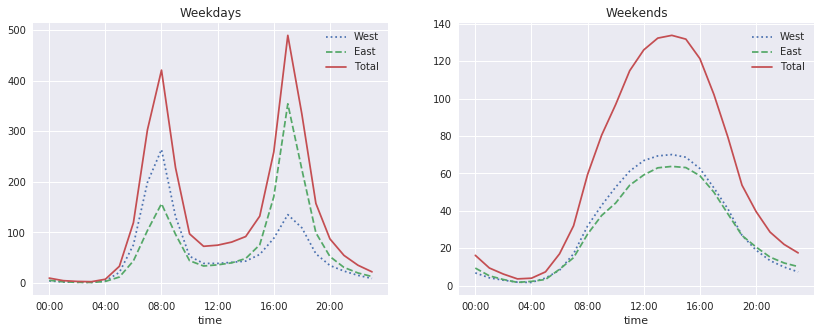

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5));
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-']);
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);